# チュートリアルのやつを決定木からlgbmに変えたやつ

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [ ]:
train = pd.get_dummies(df_train, columns=["condition", "manufacturer"])
test = pd.get_dummies(df_test, columns=["condition", "manufacturer"])

In [ ]:
train[['condition_excellent', 'condition_fair', 'condition_good', 'condition_like new', 'condition_new', 'condition_salvage']].head()


,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [ ]:
target = train["price"]
#odometer, condition, manufacturer以外を削除
train = train.drop(columns=['id', 'region', 'year', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state', "price"], axis=1)
test = test.drop(columns=['id', 'region', 'year', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state'], axis=1)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train, target, random_state = 82)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)


(20649, 132) (6883, 132) (20649,) (6883,)


In [ ]:
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 20649, number of used features: 59
[LightGBM] [Info] Start training from score 13423.992639


LGBMRegressor()

In [ ]:
pred = model.predict(X_valid)

In [ ]:
#from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
#MAPEの評価はmean_absolute_percentage_error(正解データ, 予測データ)で可能です。
score = mean_absolute_percentage_error(y_valid, pred)
print(score*100)

77.35959858323427


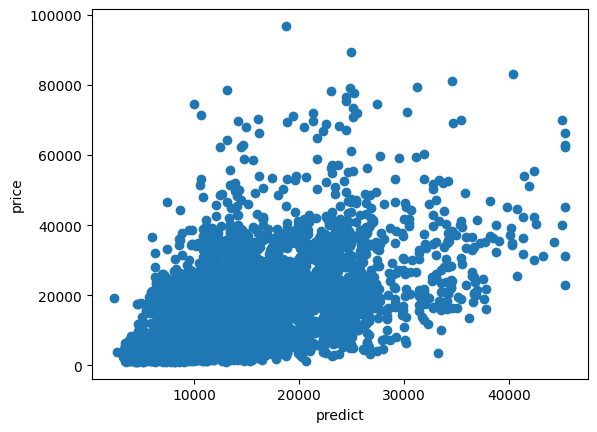

In [ ]:
#横軸が予測結果、縦軸が正解価格です
plt.scatter(pred, y_valid)
plt.xlabel("predict")
plt.ylabel("price")
plt.show()
